<a href="https://colab.research.google.com/github/AchmadFauziTrinanda/digitalskola_ds11/blob/master/Intermediate_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Homework 2***
Intermediate Statistics

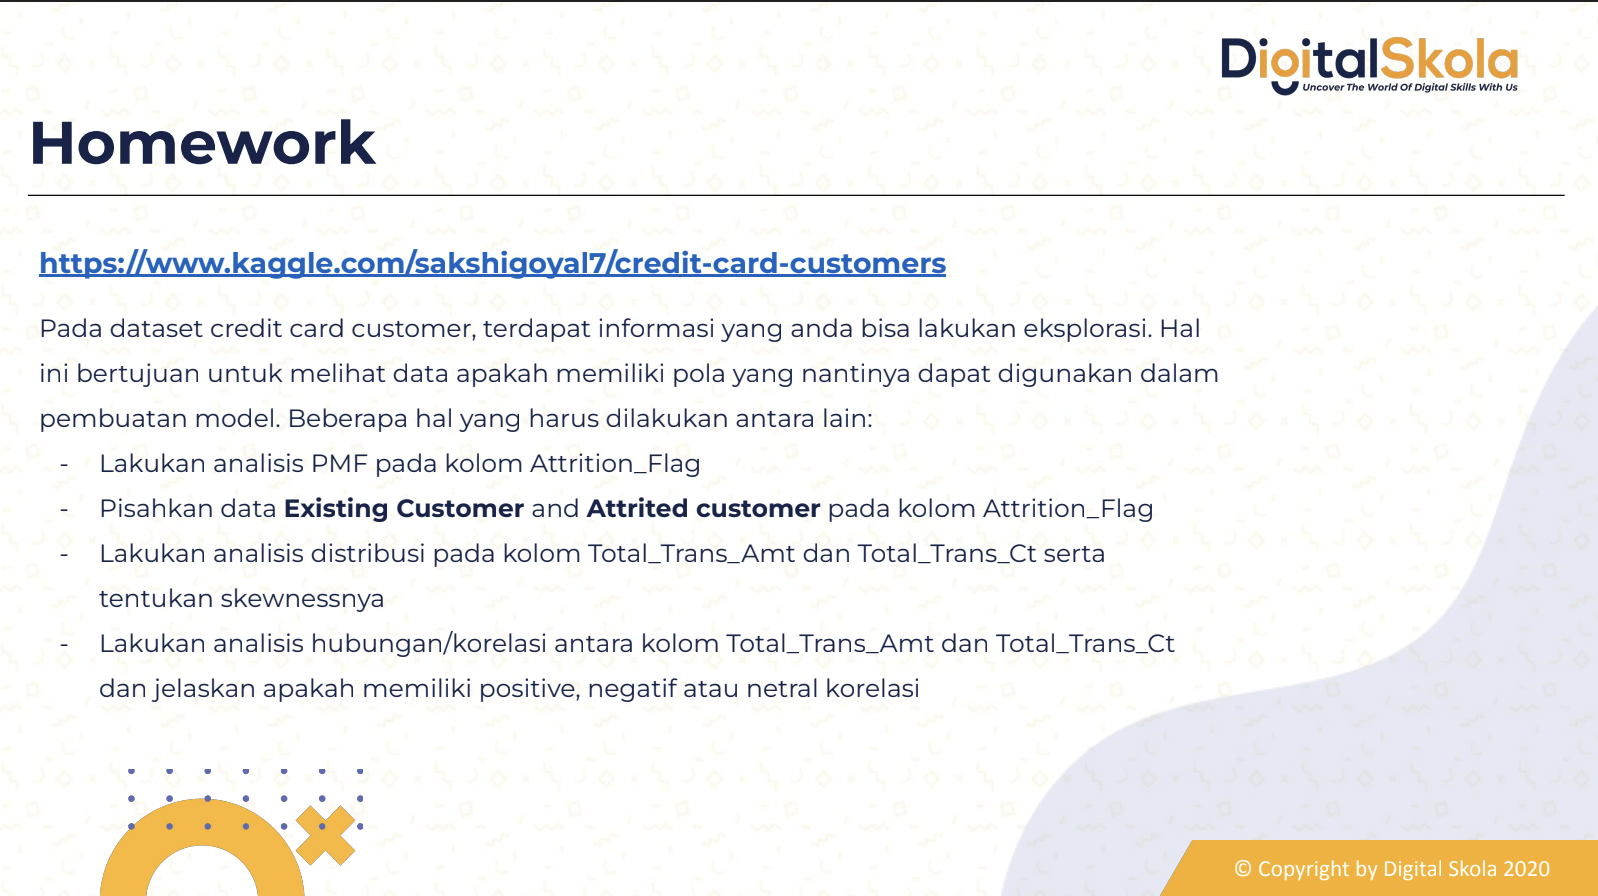

by : Achmad Fauzi Trinanda

- Install and Import libraries
- Read Data
- PMF Analysis
- Distribution and Skewness Analysis
- Correlation Analysis

#Install and Import Libraries

In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10736 sha256=fa1fcb089145910ac8d841ee5e60614cc9bb24e22b3b8a5d1efd0526bafcde8d
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [ ]:
# import library
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Read Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#PMF Analysis

In [ ]:
#PMF Analysis
data['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [ ]:
Pmf.from_seq(data['Attrition_Flag'], normalize=True)

,probs
Attrited Customer,0.16066
Existing Customer,0.83934


In [ ]:
# PMF Visualization
PMF = Pmf.from_seq(data['Attrition_Flag'], normalize=True)
PMF = pd.DataFrame({'Attrition_Flag':PMF.index, "PMF":PMF.values})

px.bar(PMF, x='Attrition_Flag', y='PMF', width=750, height=550)

#Distribution and Skewness Analysis

In [ ]:
#Existing Customer Data
data1 = data.loc[(data.Attrition_Flag == "Existing Customer")]
data1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#Attrited Customer Data
data2 = data.loc[(data.Attrition_Flag == "Attrited Customer")]
data2.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771


All Customers Skewness:  2.0410034025756936
Existing Customers Skewness:  1.995948155384814
Attrited Customers Skewness:  1.685336236708311


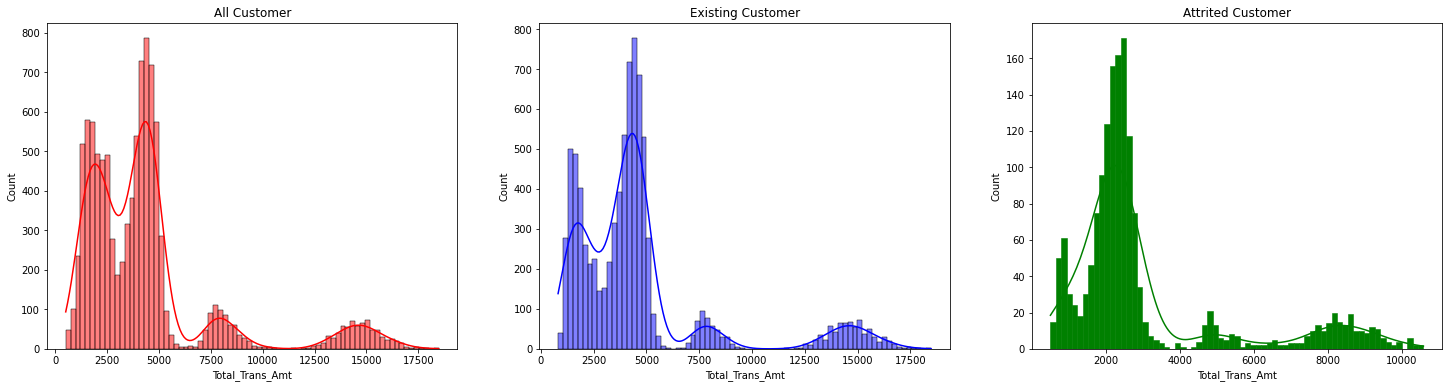

In [ ]:
#Distribution and Skewness Total_Trans_Amt
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.histplot(data=data, x='Total_Trans_Amt', kde=True, color = 'red')
plt.title('All Customer')

plt.subplot(1,3,2)
sns.histplot(data=data1, x='Total_Trans_Amt', kde=True, color = 'blue')
plt.title('Existing Customer')

plt.subplot(1,3,3)
sns.histplot(data=data2, x='Total_Trans_Amt', kde=True, Color = 'green')
plt.title('Attrited Customer')

print("All Customers Skewness: ", data['Total_Trans_Amt'].skew())
print("Existing Customers Skewness: ", data1['Total_Trans_Amt'].skew())
print("Attrited Customers Skewness: ", data2['Total_Trans_Amt'].skew())
plt.show()

All Customers Skewness:  0.15367306849872275
Existing Customers Skewness:  -0.003642152123980986
Attrited Customers Skewness:  0.4859447964562427


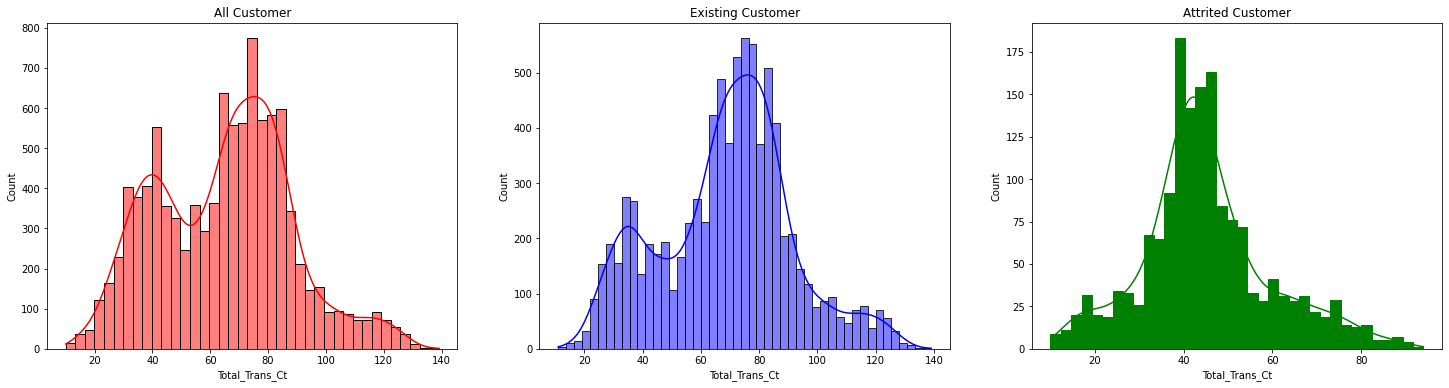

In [ ]:
#Distribution and Skewness Total_Trans_Ct
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.histplot(data=data, x='Total_Trans_Ct', kde=True, color = 'red')
plt.title('All Customer')

plt.subplot(1,3,2)
sns.histplot(data=data1, x='Total_Trans_Ct', kde=True, color = 'blue')
plt.title('Existing Customer')

plt.subplot(1,3,3)
sns.histplot(data=data2, x='Total_Trans_Ct', kde=True, Color = 'green')
plt.title('Attrited Customer')

print("All Customers Skewness: ", data['Total_Trans_Ct'].skew())
print("Existing Customers Skewness: ", data1['Total_Trans_Ct'].skew())
print("Attrited Customers Skewness: ", data2['Total_Trans_Ct'].skew())
plt.show()

#Correlation Analysis

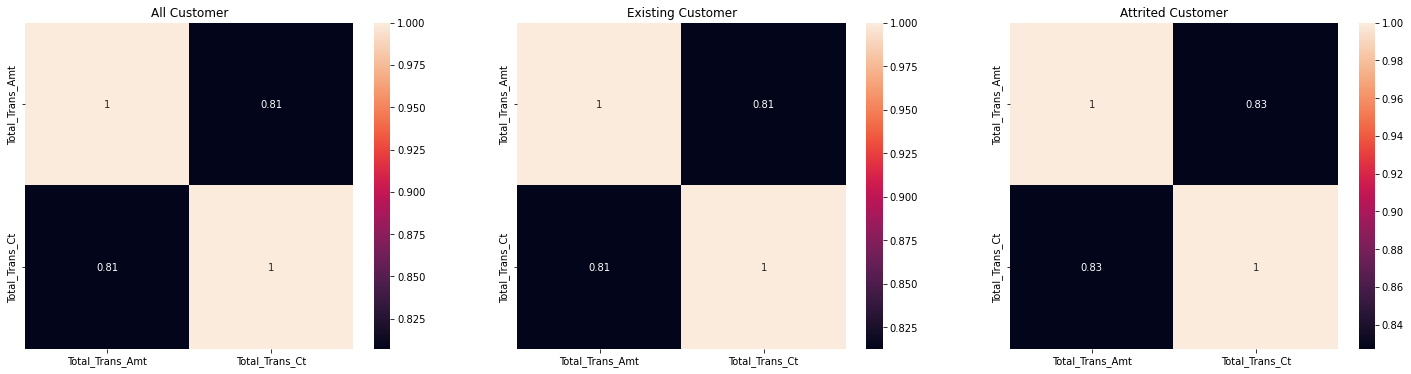

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.heatmap(data.iloc[:,17:19].corr(), annot=True)
plt.title('All Customer')

plt.subplot(1,3,2)
sns.heatmap(data1.iloc[:,17:19].corr(), annot=True)
plt.title('Existing Customer')

plt.subplot(1,3,3)
sns.heatmap(data2.iloc[:,17:19].corr(), annot=True)
plt.title('Attrited Customer')

plt.show()

All kind of data shows that Total_Trans_Amt has positive Correlation with Total_Trans_Ct

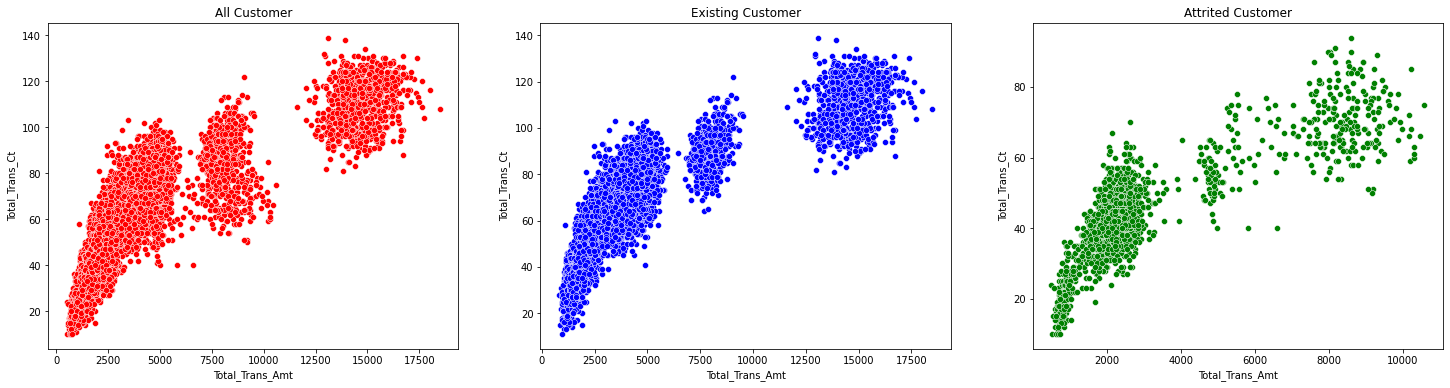

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.scatterplot(data=data, x='Total_Trans_Amt', y='Total_Trans_Ct', color = 'red')
plt.title('All Customer')

plt.subplot(1,3,2)
sns.scatterplot(data=data1, x='Total_Trans_Amt', y='Total_Trans_Ct', color = 'blue')
plt.title('Existing Customer')

plt.subplot(1,3,3)
sns.scatterplot(data=data2, x='Total_Trans_Amt', y='Total_Trans_Ct', color = 'green')
plt.title('Attrited Customer')

plt.show()

The scatter diagrams show their positive correlation

**Conclusion**

Total_Trans_Amt has positive correlation with Total_Trans_Ct